<a href="https://colab.research.google.com/github/iqbalthms/Tugas-Machine-Learning/blob/main/Uas_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.datasets import mnist

# Preprocessing Data


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(58000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.set_printoptions(linewidth=300)
print(np.array(x_test[0]))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


Modelling

In [5]:
model = tf.keras.applications.ResNet50(
                        include_top = False, 
                        input_shape = (32, 32, 3), 
                        weights = 'imagenet')

for layer in model.layers:
  layer.trainable = False

x = layers.Flatten()(model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

head_model = Model(inputs = model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [6]:
head_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

Model Compiling and fit

In [7]:
model.compile(optimizer='Adam', 
               metrics =['accuracy'],
               loss = 'categorical_crossentropy')

In [8]:
history = head_model.fit(x_train, y_train,
          batch_size = 64, 
          epochs = 10, validation_data = (x_val , y_val))

Epoch 1/10
907/907 [==============================] - 229s 245ms/step - loss: 0.5804 - accuracy: 0.8153 - val_loss: 0.2984 - val_accuracy: 0.9145
Epoch 2/10
907/907 [==============================] - 252s 278ms/step - loss: 0.3434 - accuracy: 0.8882 - val_loss: 0.2514 - val_accuracy: 0.9275
Epoch 3/10
907/907 [==============================] - 252s 278ms/step - loss: 0.3036 - accuracy: 0.9008 - val_loss: 0.1672 - val_accuracy: 0.9550
Epoch 4/10
907/907 [==============================] - 254s 280ms/step - loss: 0.2714 - accuracy: 0.9112 - val_loss: 0.1786 - val_accuracy: 0.9465
Epoch 5/10
907/907 [==============================] - 246s 271ms/step - loss: 0.2520 - accuracy: 0.9172 - val_loss: 0.1438 - val_accuracy: 0.9590
Epoch 6/10
907/907 [==============================] - 247s 272ms/step - loss: 0.2415 - accuracy: 0.9205 - val_loss: 0.1897 - val_accuracy: 0.9400
Epoch 7/10
907/907 [==============================] - 241s 266ms/step - loss: 0.2264 - accuracy: 0.9259 - val_loss: 0.1546 -

Model Evaluation

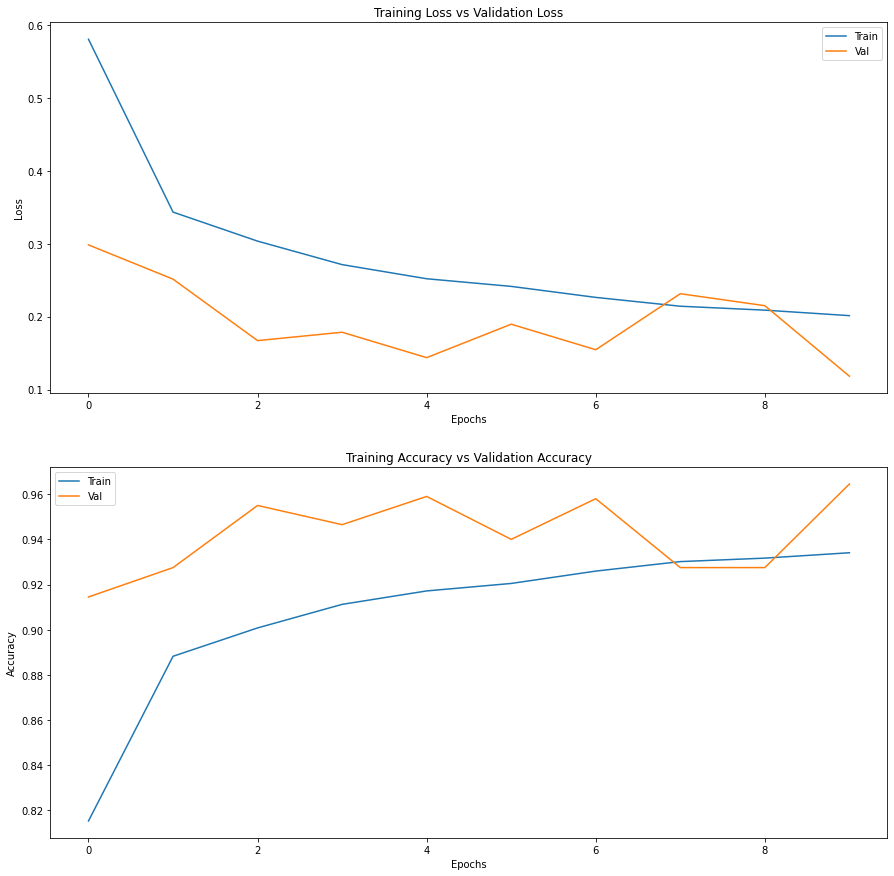

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [10]:
eval = head_model.evaluate(x_test, y_test)
eval

313/313 [==============================] - 49s 157ms/step - loss: 0.1659 - accuracy: 0.9465


[0.16587765514850616, 0.9465000033378601]

Classification

In [11]:
predict = head_model.predict(x_test)
result = np.argmax(predict, axis = 1)

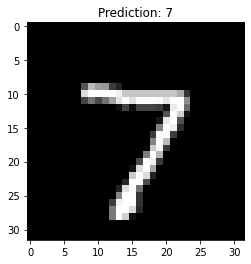

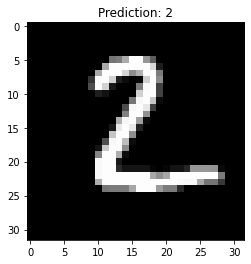

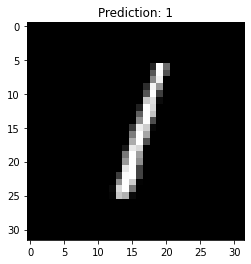

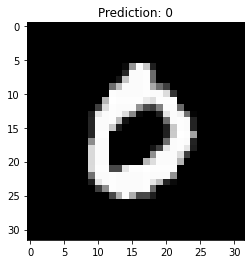

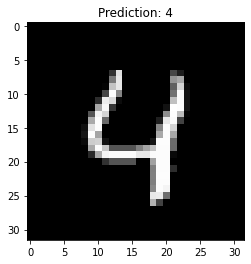

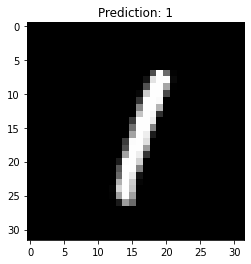

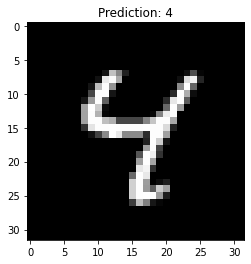

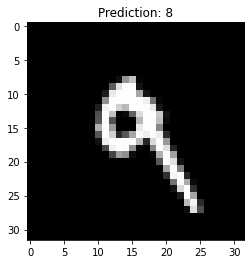

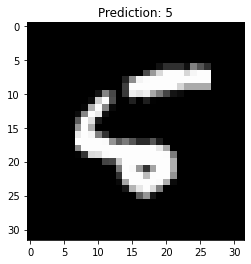

In [12]:
for sample in range(9):

  fig = plt.figure()
  plt.imshow(x_test[sample], cmap='gray', interpolation='none')
  plt.title(f'Prediction: {result[sample]}')
  plt.show()